# Homework 2 - Deep Learning Winter 2024
TA: Jerry Abu Ayoub

<font color='aqua'>
Student 1: Or Dinar 207035809
</font>
<br>
<font color='aqua'>
Student 2: Ramiz Srour 314855446
</font>

Importing necessary libraries

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

Downloading the Data, normalizing, converting to tensors and splitting the training data and loading into data loaders

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

train_dataset, validation_dataset = random_split(train_dataset, [46000, 4000])

train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
valid_loader = DataLoader(validation_dataset, shuffle=True)
test_loader = DataLoader(test_dataset, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


Getting the class names, using a dictionary to put an image of each category, and plot it.

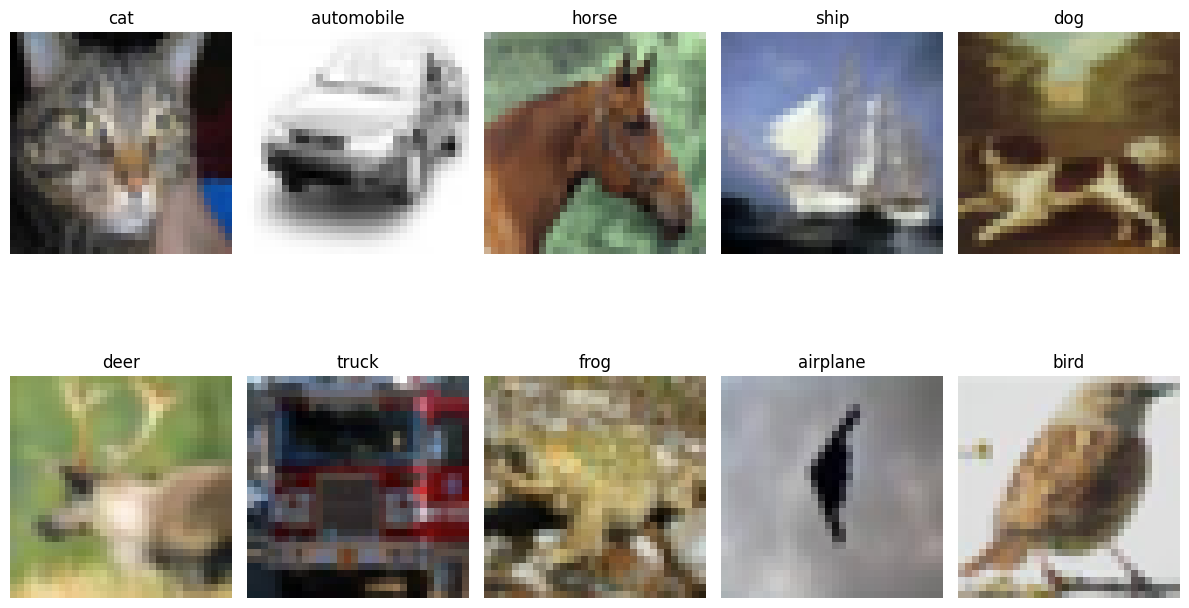

In [ ]:
classes = train_dataset.dataset.classes  # Get class names from the original dataset

# Dictionary to store one image per class
class_samples = {}
for image, label in train_dataset:
    if label not in class_samples:
        class_samples[label] = image  # Save the first image of each class
    if len(class_samples) == len(classes):  # Stop when all classes are sampled
        break

# Visualize the samples
plt.figure(figsize=(12, 8))
for i, (label, image) in enumerate(class_samples.items()):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.permute(1, 2, 0) * 0.5 + 0.5)  # Unnormalize the image
    plt.title(classes[label])
    plt.axis('off')
plt.tight_layout()
plt.show()

Task 1 NN, as requested in the PDF

In [ ]:
class Task1(nn.Module):
    def __init__(self):
        super(Task1, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(32 * 8 * 8, 10)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)  # Flatten
        x = self.fc(x)
        return x


In [ ]:
model = Task1() # Model
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = optim.Adam(model.parameters(), lr=0.001) # Optimizer

print("Model Architecture:\n")
print(model)

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("\nTotal Trainable Parameters:", total_params)


Model Architecture:

Task1(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=2048, out_features=10, bias=True)
)

Total Trainable Parameters: 25578


Epoch 1/10
Train Loss: 1.4779, Train Accuracy: 47.43%
Validation Loss: 1.2886, Validation Accuracy: 54.95%
Epoch 2/10
Train Loss: 1.1614, Train Accuracy: 59.32%
Validation Loss: 1.1390, Validation Accuracy: 59.98%
Epoch 3/10
Train Loss: 1.0295, Train Accuracy: 64.21%
Validation Loss: 1.0672, Validation Accuracy: 62.95%
Epoch 4/10
Train Loss: 0.9553, Train Accuracy: 66.93%
Validation Loss: 1.0089, Validation Accuracy: 64.90%
Epoch 5/10
Train Loss: 0.9006, Train Accuracy: 68.94%
Validation Loss: 0.9578, Validation Accuracy: 66.92%
Epoch 6/10
Train Loss: 0.8539, Train Accuracy: 70.51%
Validation Loss: 0.9463, Validation Accuracy: 66.92%
Epoch 7/10
Train Loss: 0.8188, Train Accuracy: 71.80%
Validation Loss: 0.9344, Validation Accuracy: 67.22%
Epoch 8/10
Train Loss: 0.7887, Train Accuracy: 72.92%
Validation Loss: 0.9109, Validation Accuracy: 68.70%
Epoch 9/10
Train Loss: 0.7617, Train Accuracy: 73.67%
Validation Loss: 0.9951, Validation Accuracy: 66.20%
Epoch 10/10
Train Loss: 0.7404, Train

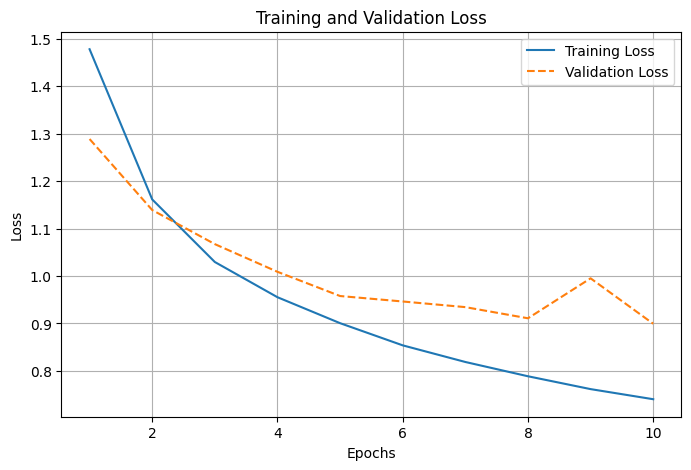

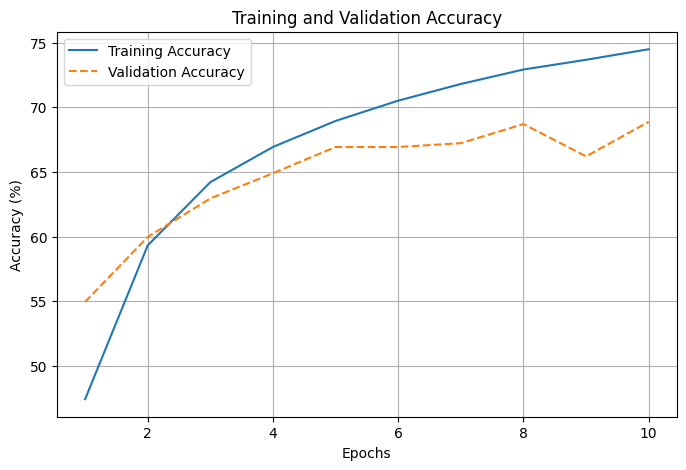

In [ ]:
# Lists to store metrics
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

num_epochs = 10

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    running_train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_loss = running_train_loss / len(train_loader)
    train_accuracy = 100 * train_correct / train_total

    # Validation Phase
    model.eval()
    running_valid_loss = 0.0
    valid_correct = 0
    valid_total = 0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_valid_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            valid_total += labels.size(0)
            valid_correct += (predicted == labels).sum().item()

    valid_loss = running_valid_loss / len(valid_loader)
    valid_accuracy = 100 * valid_correct / valid_total

    # Store metrics
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"Validation Loss: {valid_loss:.4f}, Validation Accuracy: {valid_accuracy:.2f}%")

# Test Phase
model.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100 * test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Plot the metrics
epochs = range(1, num_epochs + 1)

# Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, valid_losses, label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Training and Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, valid_accuracies, label='Validation Accuracy', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


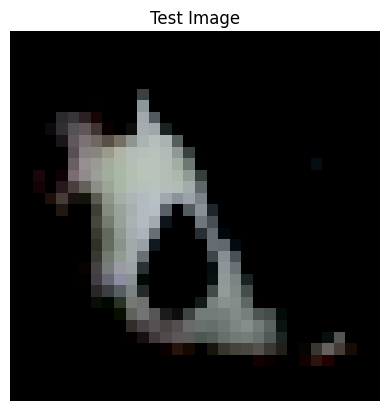

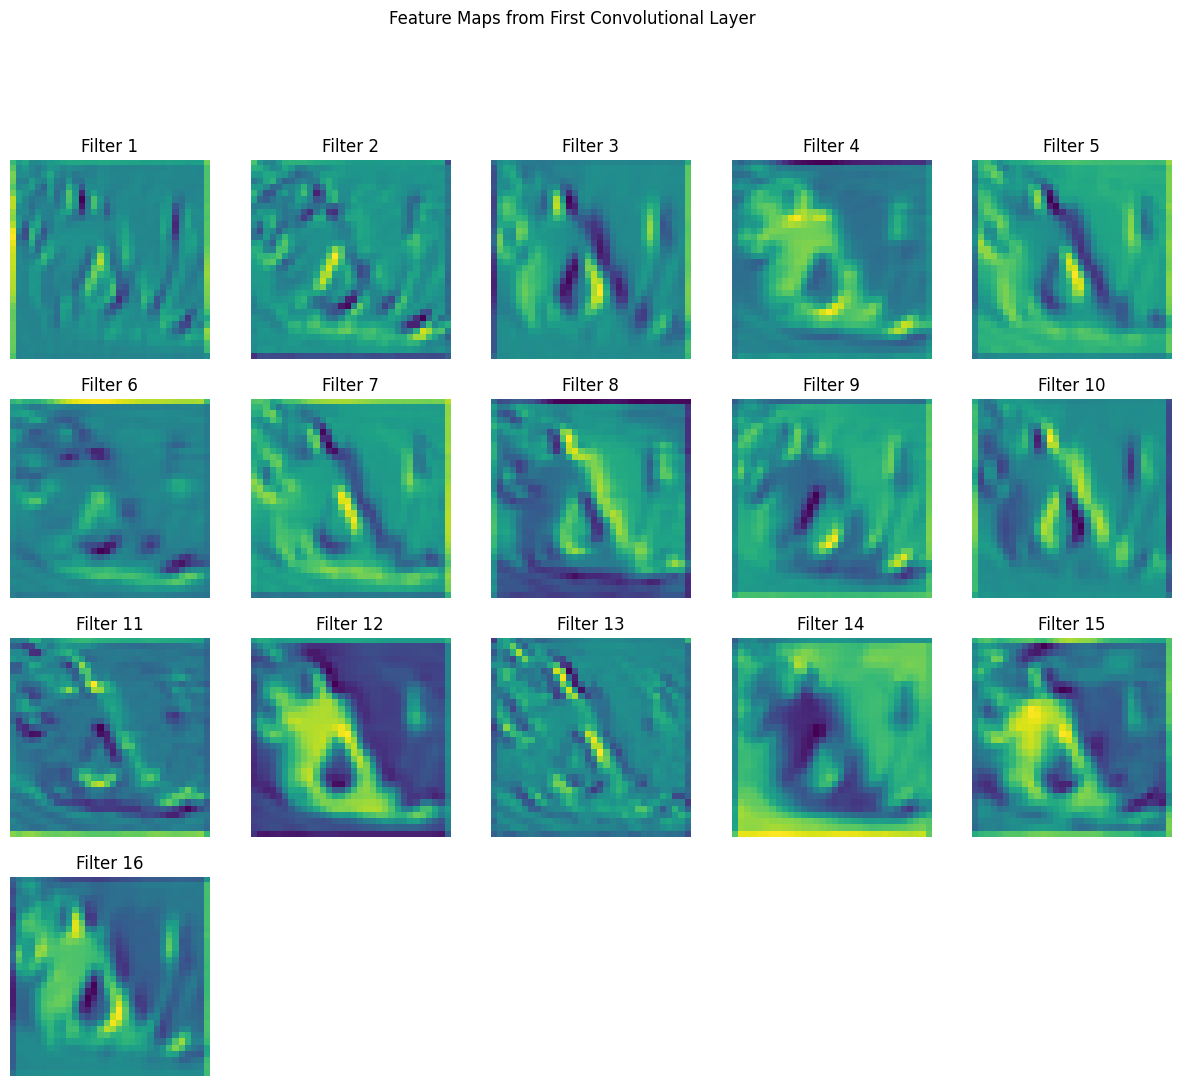

In [ ]:
model.eval()  # Model to eval

# Get a random test image
random_index = np.random.randint(0, len(test_loader.dataset))
input_image, label = test_loader.dataset[random_index]
input_image_batch = input_image.unsqueeze(0)

# Visualize the selected test image
plt.imshow(input_image.permute(1, 2, 0).numpy())
plt.title("Test Image")
plt.axis('off')
plt.show()

# Pass the image through the first convolutional layer
with torch.no_grad():
    feature_maps = model.conv1(input_image_batch)

# Convert feature maps to numpy for visualization
feature_maps = feature_maps.squeeze().numpy()

# Plot the feature maps
num_filters = feature_maps.shape[0]
plt.figure(figsize=(15, 15))
for i in range(num_filters):
    plt.subplot(int(np.sqrt(num_filters)) + 1, int(np.sqrt(num_filters)) + 1, i + 1)
    plt.imshow(feature_maps[i], cmap='viridis')
    plt.axis('off')
    plt.title(f'Filter {i + 1}')
plt.suptitle("Feature Maps from First Convolutional Layer")
plt.show()


Task 2 NN, as requested in HW PDF

In [ ]:
class Task2(nn.Module):
    def __init__(self, num_classes=10):
        super(Task2, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(128 * 2 * 2, num_classes)

    def forward(self, x):
      x = self.pool(nn.ReLU()(self.conv1(x)))
      x = self.pool(nn.ReLU()(self.conv2(x)))
      x = self.pool(nn.ReLU()(self.conv3(x)))
      x = self.pool(nn.ReLU()(self.conv4(x)))
      x = x.view(x.size(0), -1)  # Flatten
      x = self.fc(x)
      return x


In [ ]:
model = Task2()  # Model
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = optim.Adam(model.parameters(), lr=0.001) # Optimizer

print("Model Architecture:\n")
print(model)

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("\nTotal Trainable Parameters:", total_params)


Model Architecture:

Task2(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=512, out_features=10, bias=True)
)

Total Trainable Parameters: 102570


Epoch 1/10
Train Loss: 1.5144, Train Accuracy: 44.64%
Validation Loss: 1.3402, Validation Accuracy: 51.92%
Epoch 2/10
Train Loss: 1.1209, Train Accuracy: 60.16%
Validation Loss: 1.0491, Validation Accuracy: 62.40%
Epoch 3/10
Train Loss: 0.9263, Train Accuracy: 67.49%
Validation Loss: 0.9630, Validation Accuracy: 65.47%
Epoch 4/10
Train Loss: 0.8052, Train Accuracy: 71.69%
Validation Loss: 0.8622, Validation Accuracy: 70.25%
Epoch 5/10
Train Loss: 0.7107, Train Accuracy: 75.10%
Validation Loss: 0.8167, Validation Accuracy: 71.95%
Epoch 6/10
Train Loss: 0.6300, Train Accuracy: 77.99%
Validation Loss: 0.8338, Validation Accuracy: 72.25%
Epoch 7/10
Train Loss: 0.5621, Train Accuracy: 80.48%
Validation Loss: 0.8310, Validation Accuracy: 72.72%
Epoch 8/10
Train Loss: 0.5015, Train Accuracy: 82.57%
Validation Loss: 0.8826, Validation Accuracy: 72.10%
Epoch 9/10
Train Loss: 0.4494, Train Accuracy: 84.14%
Validation Loss: 0.8882, Validation Accuracy: 72.67%
Epoch 10/10
Train Loss: 0.3914, Train

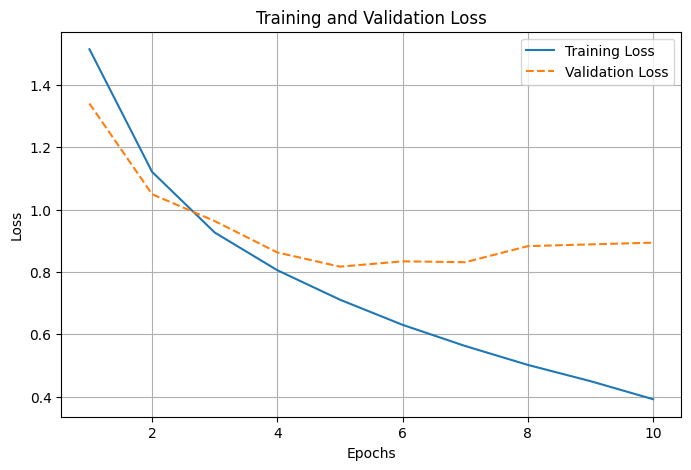

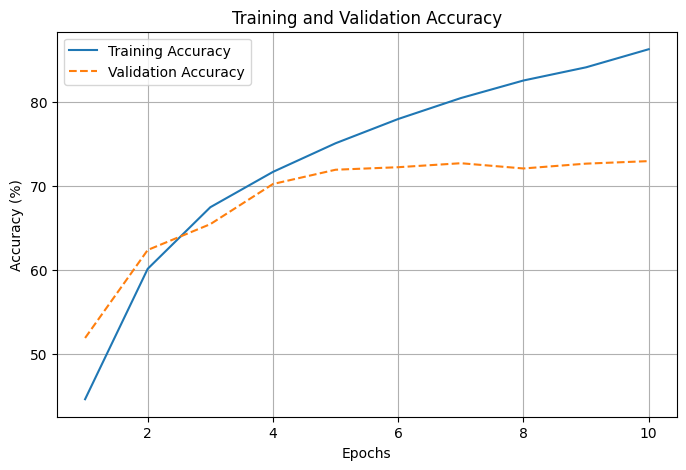

In [ ]:
# Lists to store metrics
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

num_epochs = 10

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    running_train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_loss = running_train_loss / len(train_loader)
    train_accuracy = 100 * train_correct / train_total

    # Validation Phase
    model.eval()
    running_valid_loss = 0.0
    valid_correct = 0
    valid_total = 0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_valid_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            valid_total += labels.size(0)
            valid_correct += (predicted == labels).sum().item()

    valid_loss = running_valid_loss / len(valid_loader)
    valid_accuracy = 100 * valid_correct / valid_total

    # Store metrics
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"Validation Loss: {valid_loss:.4f}, Validation Accuracy: {valid_accuracy:.2f}%")

# Test Phase
model.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100 * test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Plot the metrics
epochs = range(1, num_epochs + 1)

# Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, valid_losses, label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Training and Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, valid_accuracies, label='Validation Accuracy', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


**Network 1 and Network 2 Comparison**

 The second network outperforms the first primarily because adding two additional convolutional layers significantly increases its capacity to learn nuanced, hierarchical features (parameters as well). Where the first network stops at 32 channels, the second network progresses all the way to 128, which enables it to detect and combine more complex visual cues. Each new layer effectively refines and builds on the feature maps produced by the previous layers, allowing the model to represent objects at different levels of abstraction. Although this deeper architecture comes with greater computational time and the risk of overfitting, its higher accuracy—72% versus 69% for the shallower model—highlights the effectiveness of deeper networks when the data, training strategy, and resources are sufficient.

 Network 2 started with a lower initial validation accuracy (51.92% vs. 54.95%) yet ended up higher at the end of training (72.97% vs. 68.88%), and achieved better test accuracy (72.13% vs. 68.93%). While Network 2’s training accuracy was much higher (86.29% vs. 74.48%), indicating heavier overfitting, it still generalizes better based on its validation and test results. Consequently, despite its larger train–validation accuracy gap, Network 2’s deeper architecture ultimately yields stronger overall performance.

Task 3 NN, as requested in HW PDF

In [ ]:
class Task3(nn.Module):
    def __init__(self):
        super(Task3, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=2, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=2, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(32 * 1 * 1, 10)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x


In [ ]:
model = Task3()  # Model
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Model Architecture:\n")
print(model)

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("\nTotal Trainable Parameters:", total_params)


Model Architecture:

Task3(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=32, out_features=10, bias=True)
)

Total Trainable Parameters: 14378


Epoch 1/10
Train Loss: 1.6931, Train Accuracy: 39.10%
Validation Loss: 1.4933, Validation Accuracy: 46.08%
Epoch 2/10
Train Loss: 1.4245, Train Accuracy: 49.02%
Validation Loss: 1.3954, Validation Accuracy: 50.10%
Epoch 3/10
Train Loss: 1.3272, Train Accuracy: 52.57%
Validation Loss: 1.3354, Validation Accuracy: 53.55%
Epoch 4/10
Train Loss: 1.2611, Train Accuracy: 55.27%
Validation Loss: 1.2719, Validation Accuracy: 55.15%
Epoch 5/10
Train Loss: 1.2157, Train Accuracy: 56.81%
Validation Loss: 1.2623, Validation Accuracy: 55.15%
Epoch 6/10
Train Loss: 1.1827, Train Accuracy: 58.35%
Validation Loss: 1.2642, Validation Accuracy: 55.27%
Epoch 7/10
Train Loss: 1.1538, Train Accuracy: 59.55%
Validation Loss: 1.2165, Validation Accuracy: 57.10%
Epoch 8/10
Train Loss: 1.1309, Train Accuracy: 60.23%
Validation Loss: 1.1914, Validation Accuracy: 58.20%
Epoch 9/10
Train Loss: 1.1127, Train Accuracy: 61.12%
Validation Loss: 1.2010, Validation Accuracy: 58.48%
Epoch 10/10
Train Loss: 1.0960, Train

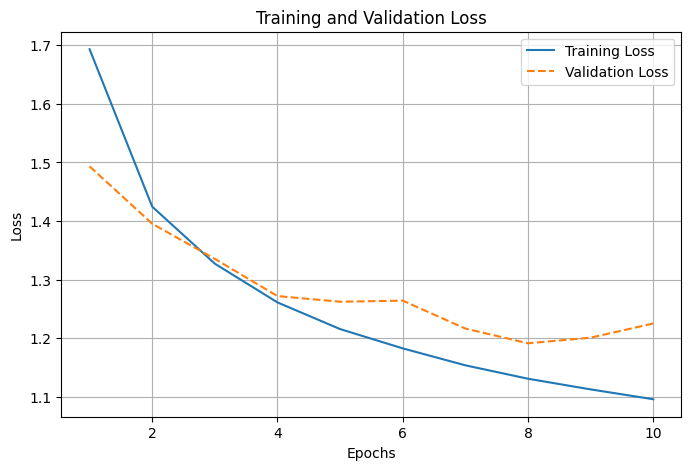

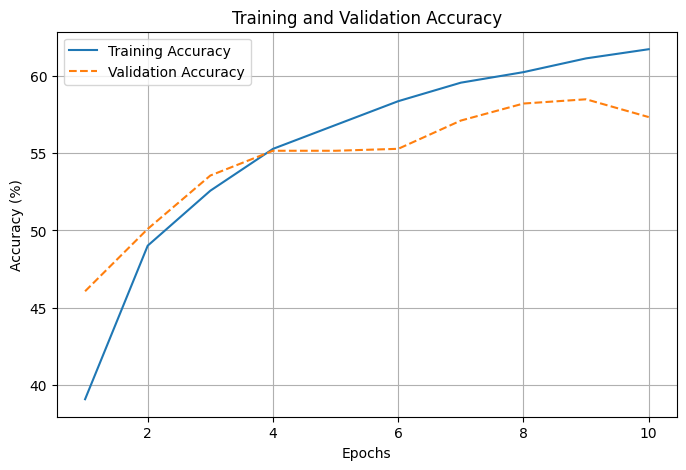

In [ ]:
# Lists to store metrics
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

num_epochs = 10

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    running_train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_loss = running_train_loss / len(train_loader)
    train_accuracy = 100 * train_correct / train_total

    # Validation Phase
    model.eval()
    running_valid_loss = 0.0
    valid_correct = 0
    valid_total = 0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_valid_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            valid_total += labels.size(0)
            valid_correct += (predicted == labels).sum().item()

    valid_loss = running_valid_loss / len(valid_loader)
    valid_accuracy = 100 * valid_correct / valid_total

    # Store metrics
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"Validation Loss: {valid_loss:.4f}, Validation Accuracy: {valid_accuracy:.2f}%")

# Test Phase
model.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100 * test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Plot the metrics
epochs = range(1, num_epochs + 1)

# Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, valid_losses, label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Training and Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, valid_accuracies, label='Validation Accuracy', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


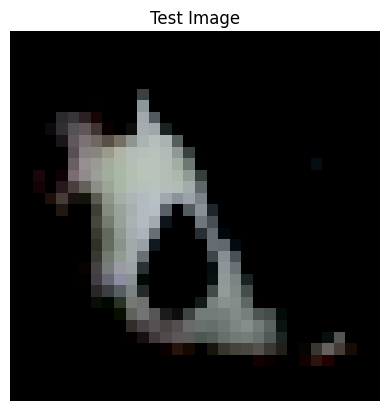

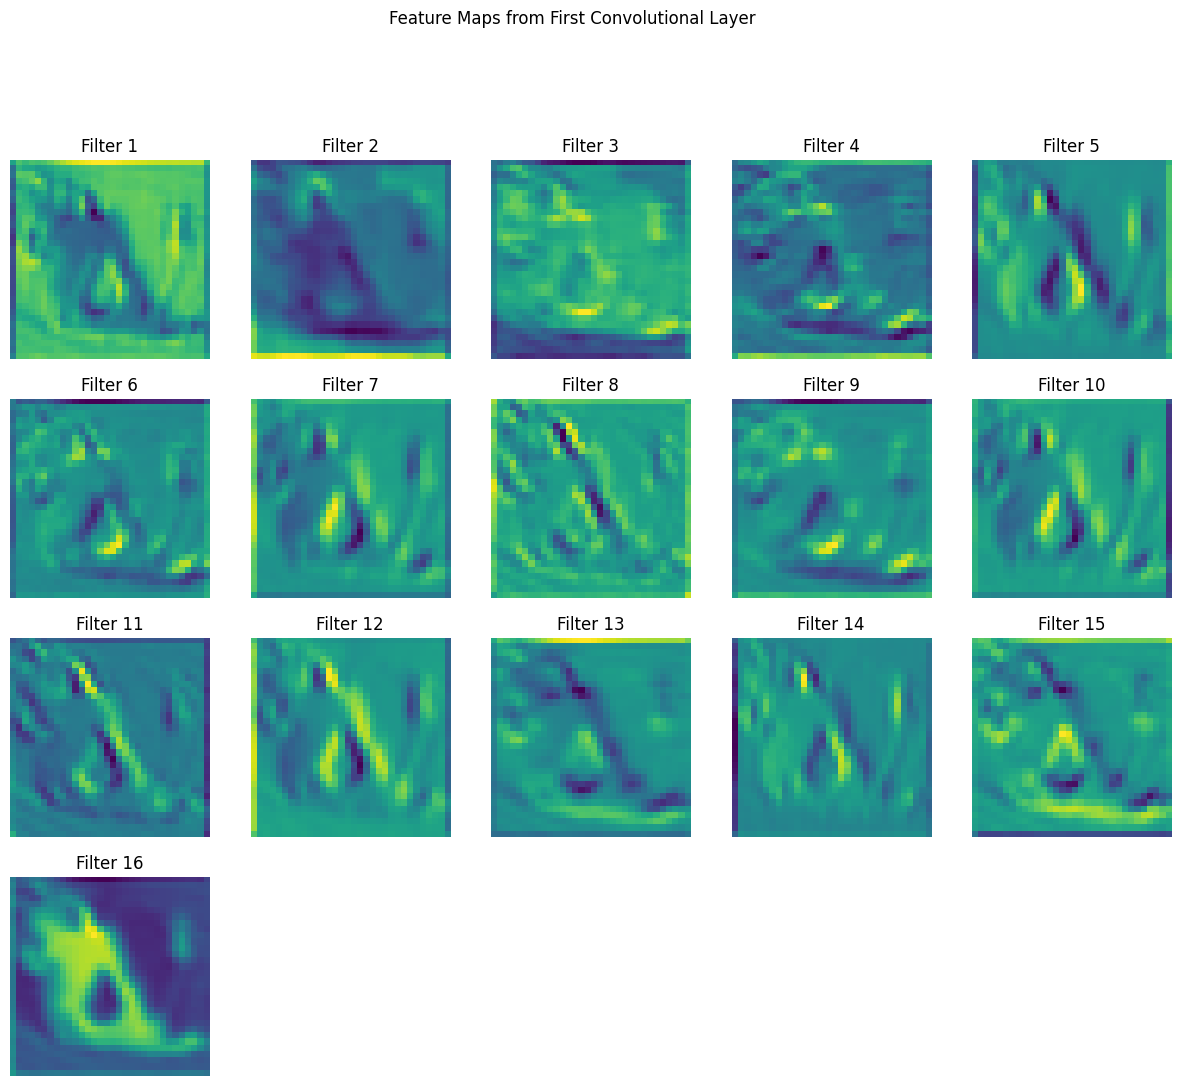

In [ ]:
model.eval()  # Model to evaluation mode

# Use same random chosen image from before
input_image, label = test_loader.dataset[random_index]
input_image_batch = input_image.unsqueeze(0)

# Visualize the selected test image
plt.imshow(input_image.permute(1, 2, 0).numpy())
plt.title("Test Image")
plt.axis('off')
plt.show()

# Pass the image through the first convolutional layer
with torch.no_grad():
    feature_maps = model.conv1(input_image_batch)

# Convert feature maps to numpy for visualization
feature_maps = feature_maps.squeeze().numpy()

# Plot the feature maps
num_filters = feature_maps.shape[0]
plt.figure(figsize=(15, 15))
for i in range(num_filters):
    plt.subplot(int(np.sqrt(num_filters)) + 1, int(np.sqrt(num_filters)) + 1, i + 1)
    plt.imshow(feature_maps[i], cmap='viridis')
    plt.axis('off')
    plt.title(f'Filter {i + 1}')
plt.suptitle("Feature Maps from First Convolutional Layer")
plt.show()


**Network 2 and Network 3 Comparison**

Network 3
Compared to Network 2 (which achieved around 72% test accuracy), this revised Network 3 performs noticeably worse, reaching only 56.48% on the test set. While Network 3 still uses 5×5 kernels and stride=2 (leading to faster spatial downsampling), it has reverted to only two convolutional layers instead of four, significantly reducing its representational capacity. Consequently, even though its training loss steadily decreases (ending at around 1.0960) and it gains some accuracy over epochs (up to about 61.71% on training), its validation accuracy stalls below 60% and test accuracy winds up considerably lower than Network 2’s results. Ultimately, this highlights that deeper architectures (like Network 2) can learn richer features and generalize better, whereas simply increasing kernel size and stride in a shallower model does not yield the same level of performance.

In [ ]:
class Task4(nn.Module):
    def __init__(self, num_classes=10):
        super(Task4, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(128 * 2 * 2, num_classes)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = self.pool(nn.ReLU()(self.conv3(x)))
        x = self.pool(nn.ReLU()(self.conv4(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x

In [ ]:
model = Task4()  # Model
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = optim.Adam(model.parameters(), lr=0.001) # Optimizer

print("Model Architecture:\n")
print(model)

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("\nTotal Trainable Parameters:", total_params)


Model Architecture:

Task4(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc): Linear(in_features=512, out_features=10, bias=True)
)

Total Trainable Parameters: 102570


Epoch 1/10
Train Loss: 1.6756, Train Accuracy: 38.55%
Validation Loss: 1.4348, Validation Accuracy: 48.12%
Epoch 2/10
Train Loss: 1.3717, Train Accuracy: 50.35%
Validation Loss: 1.3315, Validation Accuracy: 51.52%
Epoch 3/10
Train Loss: 1.2276, Train Accuracy: 56.35%
Validation Loss: 1.1861, Validation Accuracy: 57.60%
Epoch 4/10
Train Loss: 1.1170, Train Accuracy: 60.26%
Validation Loss: 1.1104, Validation Accuracy: 60.42%
Epoch 5/10
Train Loss: 1.0348, Train Accuracy: 63.28%
Validation Loss: 1.0485, Validation Accuracy: 63.40%
Epoch 6/10
Train Loss: 0.9585, Train Accuracy: 66.30%
Validation Loss: 1.0138, Validation Accuracy: 64.45%
Epoch 7/10
Train Loss: 0.8961, Train Accuracy: 68.43%
Validation Loss: 1.0066, Validation Accuracy: 64.83%
Epoch 8/10
Train Loss: 0.8369, Train Accuracy: 70.55%
Validation Loss: 0.9091, Validation Accuracy: 67.95%
Epoch 9/10
Train Loss: 0.7866, Train Accuracy: 72.37%
Validation Loss: 0.8973, Validation Accuracy: 69.10%
Epoch 10/10
Train Loss: 0.7419, Train

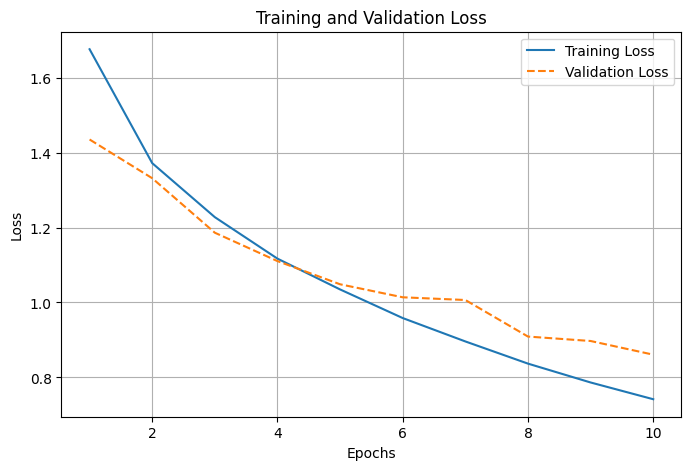

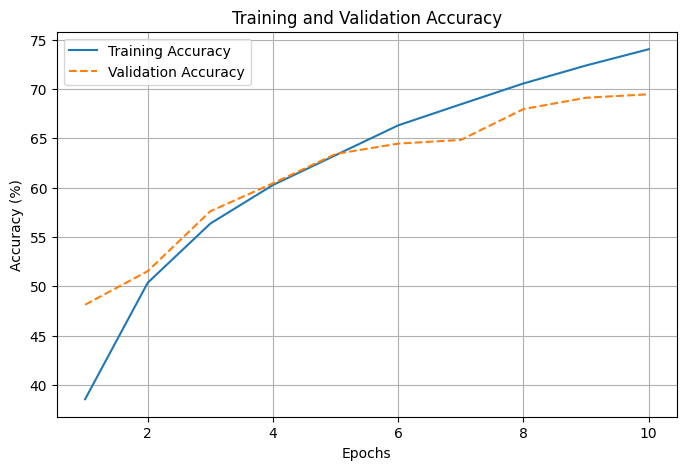

In [ ]:
# Lists to store metrics
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

num_epochs = 10

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    running_train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_loss = running_train_loss / len(train_loader)
    train_accuracy = 100 * train_correct / train_total

    # Validation Phase
    model.eval()
    running_valid_loss = 0.0
    valid_correct = 0
    valid_total = 0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_valid_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            valid_total += labels.size(0)
            valid_correct += (predicted == labels).sum().item()

    valid_loss = running_valid_loss / len(valid_loader)
    valid_accuracy = 100 * valid_correct / valid_total

    # Store metrics
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"Validation Loss: {valid_loss:.4f}, Validation Accuracy: {valid_accuracy:.2f}%")

# Test Phase
model.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100 * test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Plot the metrics
epochs = range(1, num_epochs + 1)

# Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, valid_losses, label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Training and Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, valid_accuracies, label='Validation Accuracy', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


**Network 2 and Network 4 Comparison**

Both Network 2 and Network 4 share the same deeper architecture of four convolutional layers (increasing channels from 16 to 128), each followed by a pooling step and ending in a fully connected layer, but they differ in how they pool: Network 2 uses max pooling while Network 4 employs average pooling. In practice, Network 2 achieves higher final accuracy—around 72.13% on the test set—compared to Network 4, which reaches about 69.28%. The switch to average pooling in Network 4 smooths out activations and reduces the emphasis on strong local features, ultimately resulting in slightly lower validation and test performance. Thus, despite identical depths and convolutional configurations, max pooling in Network 2 provides a more discriminative feature extraction process and leads to better overall accuracy than the average-pooling variant in Network 4.